<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_09_Keras_Shallow_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.5 MB/s eta 0:00:00


## **A. Feedforward Neural Network (FNN)**
<img src = 'https://uc-r.github.io/public/images/analytics/deep_learning/deep_nn.png'>

### **1. 입력변수 4개, 출력변수 1개 Classification**

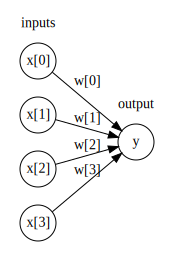

In [ ]:
import mglearn

mglearn.plot_nn_graphs.plot_logistic_regression_graph()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
# Generate synthetic data for binary classification with added noise
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42, flip_y=0.1)

# Add Gaussian noise to the features
noise = np.random.normal(0, 0.1, X.shape)
X += noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(800, 4)
(800,)


In [ ]:
# Define the model
model = Sequential()

# Input layer with 4 input neurons and a dense output layer
model.add(Dense(1, input_dim=4, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6866 - loss: 0.6325 - val_accuracy: 0.7300 - val_loss: 0.5757
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7069 - loss: 0.5820 - val_accuracy: 0.7400 - val_loss: 0.5556
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.5656 - val_accuracy: 0.7650 - val_loss: 0.5377
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.5773 - val_accuracy: 0.7850 - val_loss: 0.5227
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7402 - loss: 0.5402 - val_accuracy: 0.7850 - val_loss: 0.5103
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 0.5073 - val_accuracy: 0.8050 - val_loss: 0.4994
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7534 - loss: 0.4873 - val_accuracy: 0.8100 - val_loss: 0.4907
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7676 - loss: 0.5108 - val_accuracy: 0.8100 - val_loss:

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8438 - loss: 0.4117 - val_accuracy: 0.8250 - val_loss: 0.4520
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8230 - loss: 0.4501 - val_accuracy: 0.8250 - val_loss: 0.4520
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8420 - loss: 0.4352 - val_accuracy: 0.8250 - val_loss: 0.4521
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8357 - loss: 0.4368 - val_accuracy: 0.8250 - val_loss: 0.4522
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8306 - loss: 0.4235 - val_accuracy: 0.8250 - val_loss: 0.4522
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8175 - loss: 0.4400 - val_accuracy: 0.8250 - val_loss: 0.4523
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8559 - loss: 0.3851 - val_accuracy: 0.8250 - val_loss: 0.4523
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8299 - loss: 0.4477 - val_accuracy: 0.8250 - val_los

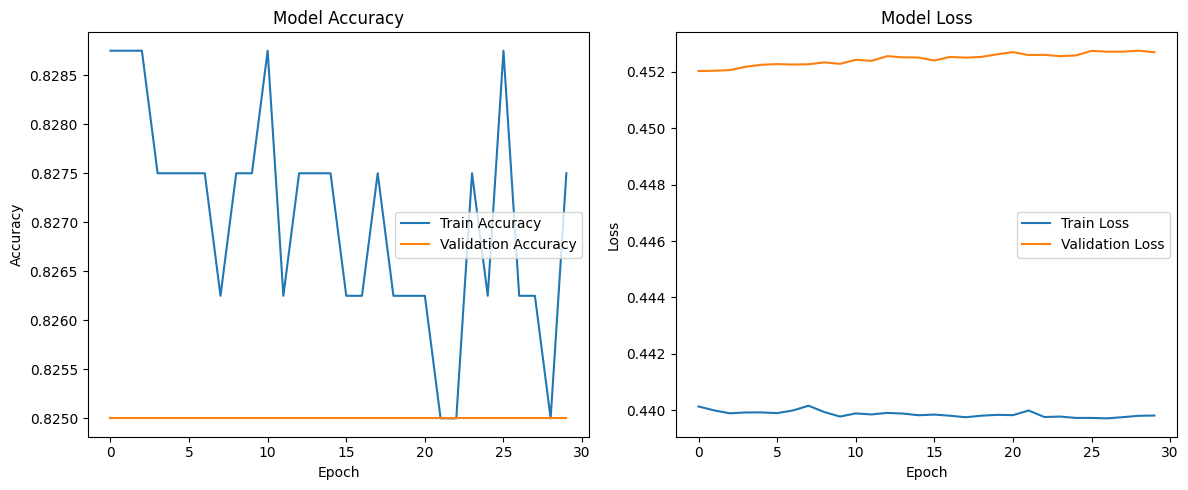

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### **2. 입력변수 4개, 히든 레이어1개(노드3개), 출력변수 1개 Classification**

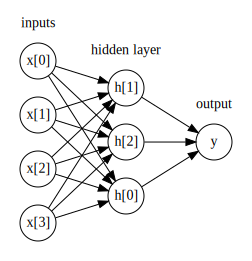

In [ ]:
mglearn.plot_nn_graphs.plot_single_hidden_layer_graph()

In [ ]:
# Define the model
model = Sequential()

# Input layer with 4 input neurons, hidden layer with 3 neurons, and a dense output layer
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39 (156.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8128 - loss: 0.4356 - val_accuracy: 0.8200 - val_loss: 0.4366
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8329 - loss: 0.4108 - val_accuracy: 0.8200 - val_loss: 0.4365
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8109 - loss: 0.4380 - val_accuracy: 0.8200 - val_loss: 0.4363
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8495 - loss: 0.3926 - val_accuracy: 0.8200 - val_loss: 0.4363
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8416 - loss: 0.4069 - val_accuracy: 0.8200 - val_loss: 0.4360
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8480 - loss: 0.3965 - val_accuracy: 0.8200 - val_loss: 0.4360
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8395 - loss: 0.4300 - val_accuracy: 0.8200 - val_loss: 0.4356
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8359 - loss: 0.4150 - val_accuracy: 0.8200 - val_loss

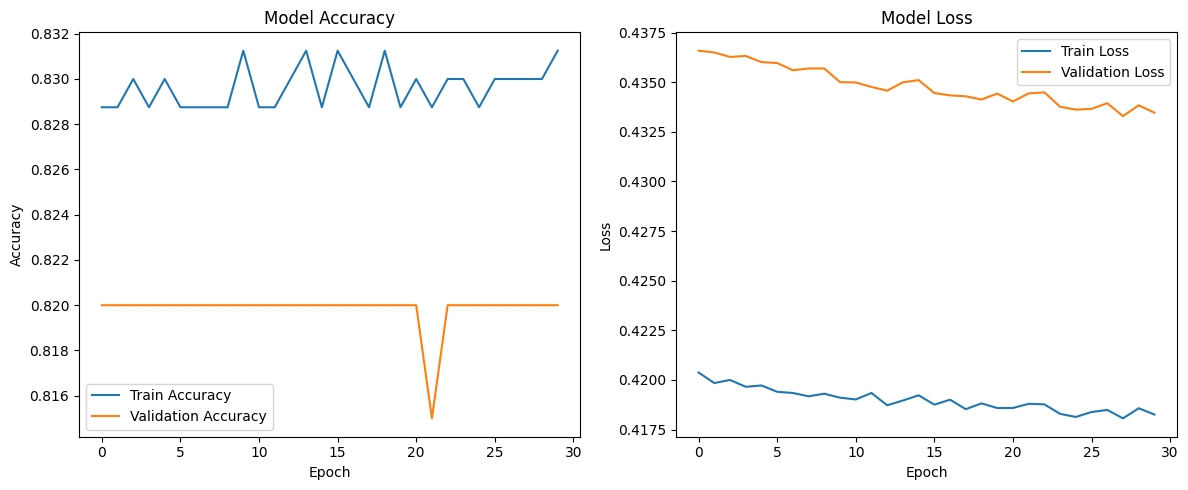

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **3. 입력변수 4개, 히든 레이어 2개 각각 노드3개, 출력변수 1개 Classification**

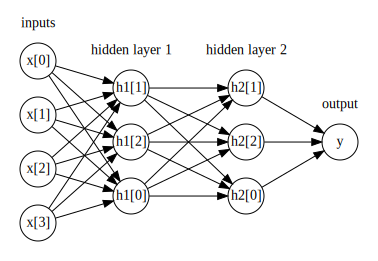

In [ ]:
mglearn.plot_nn_graphs.plot_two_hidden_layer_graph()

In [ ]:
# Define the model
model = Sequential()

# Input layer with 4 input neurons, two hidden layers with 3 neurons each, and a dense output layer
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8528 - loss: 0.3939 - val_accuracy: 0.8050 - val_loss: 0.4637
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - loss: 0.4471 - val_accuracy: 0.8050 - val_loss: 0.4630
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8055 - loss: 0.4666 - val_accuracy: 0.8050 - val_loss: 0.4628
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 0.4236 - val_accuracy: 0.8050 - val_loss: 0.4629
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.4335 - val_accuracy: 0.8050 - val_loss: 0.4630
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8271 - loss: 0.4423 - val_accuracy: 0.8050 - val_loss: 0.4627
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8142 - loss: 0.4335 - val_accuracy: 0.8000 - val_loss: 0.4625
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.4072 - val_accuracy: 0.8050 - val_loss:

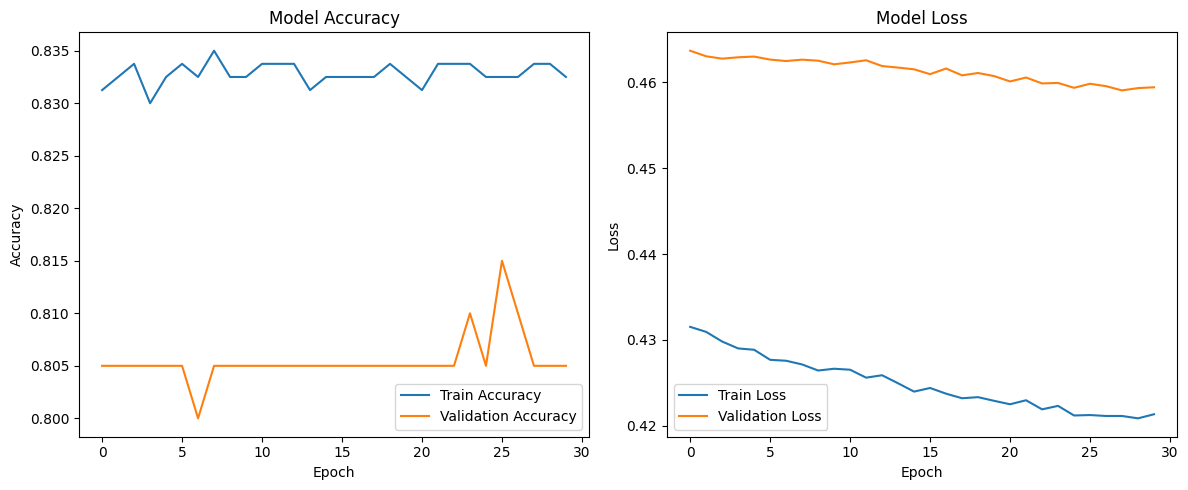

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## **4. 단순회귀분석과 FNN**
### Simple Linear Regression Equation
- The simple linear regression equation is defined as:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$


### Multiple Linear Regression Equation
- The multiple linear regression equation is defined as:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
$$



# **B.  Recurrent Neural Network(RNN)**
- Feedforward Neural Network(FNN)는 입력에서 출력으로 정보가 한 방향으로만 흐르는 순환이 없는 가장 기본적인 형태
       - FNN: 입력층에서 출력층으로 데이터가 한 방향으로만 전달되는 방식

- **RNN은 시계열 데이터와 같이 시간 종속성이 있는 데이터에 강점**
      - RNN: 데이터를 순차적으로 처리하며 이전 상태를 다음 상태에 반영하는 순환구조
- <img src = 'https://blog.skby.net/wp-content/uploads/2019/01/1-39.png'>

In [ ]:
# 예제 데이터 생성 (FNN과 RNN 모두에 사용 가능)

# 이진 분류 문제를 위한 데이터셋 생성 (샘플 수: 1000, 특성 수: 10)
# 데이터 생성
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# 가우시안 노이즈 추가
noise = np.random.normal(0, 0.5, X.shape)  # 평균 0, 표준편차 0.5인 노이즈 추가
X = X + noise

# 데이터셋을 학습과 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(800, 10)
(800,)


In [ ]:
# FNN 모델 예제 데이터 적용
fnn_model = Sequential()
fnn_model.add(Dense(64, input_dim=10, activation='relu'))
fnn_model.add(Dense(64, activation='relu'))
fnn_model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# FNN 모델 학습
fnn_history = fnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6385 - loss: 0.6173 - val_accuracy: 0.8600 - val_loss: 0.4625
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8400 - loss: 0.4387 - val_accuracy: 0.8700 - val_loss: 0.3764
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.3544 - val_accuracy: 0.8750 - val_loss: 0.3368
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8832 - loss: 0.3270 - val_accuracy: 0.8550 - val_loss: 0.3180
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.3001 - val_accuracy: 0.8850 - val_loss: 0.2962
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9021 - loss: 0.2610 - val_accuracy: 0.8850 - val_loss: 0.2855
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8818 - loss: 0.2986 - val_accuracy: 0.8850 - val_loss: 0.2744
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9153 - loss: 0.2452 - val_accuracy: 0.9050 - val_loss: 0.2629
Ep

In [ ]:
from keras.layers import SimpleRNN


# RNN 모델 예제 데이터 준비 (시계열 데이터 형식으로 변환)
# X의 형상을 (샘플 수, 타임스텝, 특성 수)로 변경
X_rnn_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_rnn_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(X_rnn_train.shape)
print(X_rnn_test.shape)

(800, 10, 1)
(200, 10, 1)


- X_rnn_train의 출력 형상은 (800, 10, 1) 설명 :
     - 800: 학습 데이터 샘플의 개수.
     - 10: 각 샘플의 타임스텝 수. 즉, 각 샘플이 10개의 연속된 시점
     - 1: 각 타임스텝에서 관측되는 특성의 수

- 삼성전자 과거 800일 동안의 주가는 과거 10일동안 타입스텝으로 주가를 예측


In [ ]:
# RNN 모델 정의
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(10, 1), activation='tanh'))
rnn_model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# RNN 모델 학습
rnn_history = rnn_model.fit(X_rnn_train, y_train, validation_data=(X_rnn_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6242 - loss: 0.6169 - val_accuracy: 0.7900 - val_loss: 0.4308
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7959 - loss: 0.4561 - val_accuracy: 0.8050 - val_loss: 0.4055
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7925 - loss: 0.4478 - val_accuracy: 0.8150 - val_loss: 0.3934
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8220 - loss: 0.4089 - val_accuracy: 0.8650 - val_loss: 0.3661
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8109 - loss: 0.4060 - val_accuracy: 0.8750 - val_loss: 0.3566
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8393 - loss: 0.3634 - val_accuracy: 0.8500 - val_loss: 0.3374
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8530 - loss: 0.3614 - val_accuracy: 0.8700 - val_loss: 0.3150
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8732 - loss: 0.3106 - val_accuracy: 0.8450 - val_

In [ ]:
# 결과 출력 (최종 평가)
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_test, y_test, verbose=0)
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_rnn_test, y_test, verbose=0)

print(f"FNN 모델 정확도: {fnn_accuracy:.4f}")
print(f"RNN 모델 정확도: {rnn_accuracy:.4f}")

FNN 모델 정확도: 0.9100
RNN 모델 정확도: 0.8750


### 만약 삼성전자의 주가가 과거 10일치에 timestep으로 영향을 받는 다고 가정하여 데이터 생성